In [43]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r"C:\Users\blend\Projects\Data\Mental_Health_and_Social_Media_Balance_Dataset.csv")


In [45]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    int64  
 5   Stress_Level(1-10)         500 non-null    int64  
 6   Days_Without_Social_Media  500 non-null    int64  
 7   Exercise_Frequency(week)   500 non-null    int64  
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


Missing Values:
User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64


Data Types:
User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)            int64
Stress_Level(1-10)             int64
Days_Without_Social_Media      int64
Exercise_Frequency(week)       int64
Social_Media_Platform         object
Happiness_Index(1-10)          int64
dtype: object


Correlation Matrix:
                                Age  Daily_Screen_Time(hrs)  \
Age                        1.000000                0.023505   
Daily_Screen_Time(hrs)     0.023505                1.000000   
Sleep_Quality(1-10)       -0.053813               -0

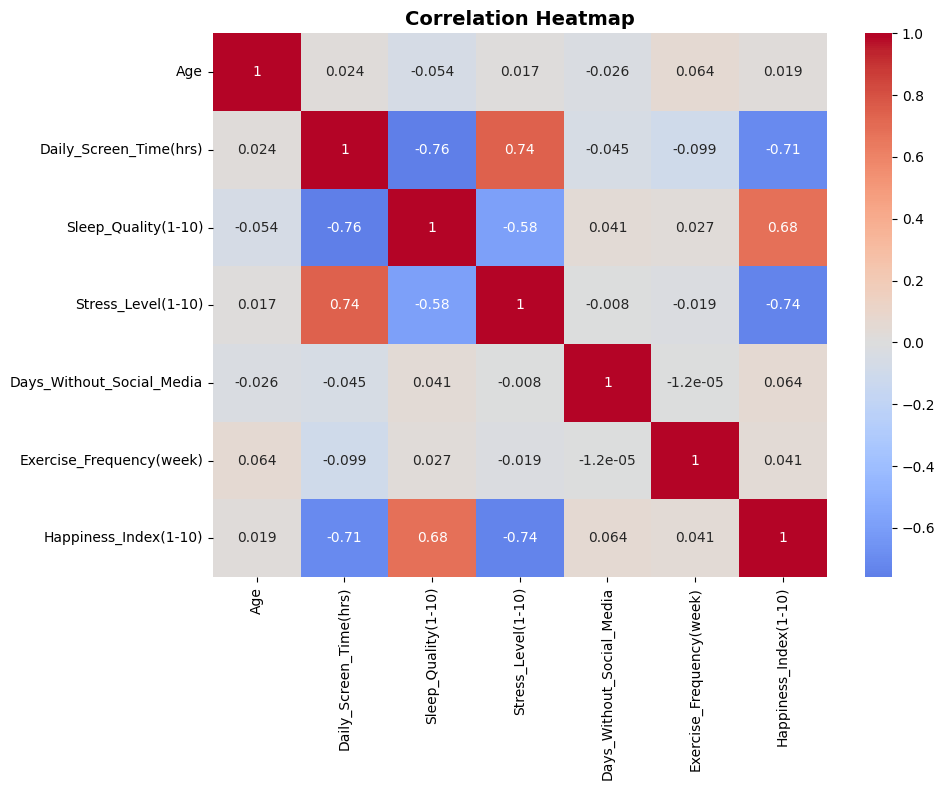

In [46]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Data types
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

# Correlation matrix
print("Correlation Matrix:")
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation coefficient: 0.740

Average Stress Level by Screen Time Category:
                          mean       std  count
Screen_Time_Category                           
Light (0-4h)          4.932039  1.096001    103
Moderate (4-8h)       6.904110  1.248784    365
Heavy (8-12h)         8.781250  0.906406     32
Extreme (12-24h)           NaN       NaN      0


C:\Users\blend\AppData\Local\Temp\ipykernel_31152\3829117712.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Screen_Time_Category')['Stress_Level(1-10)'].agg(['mean', 'std', 'count']))


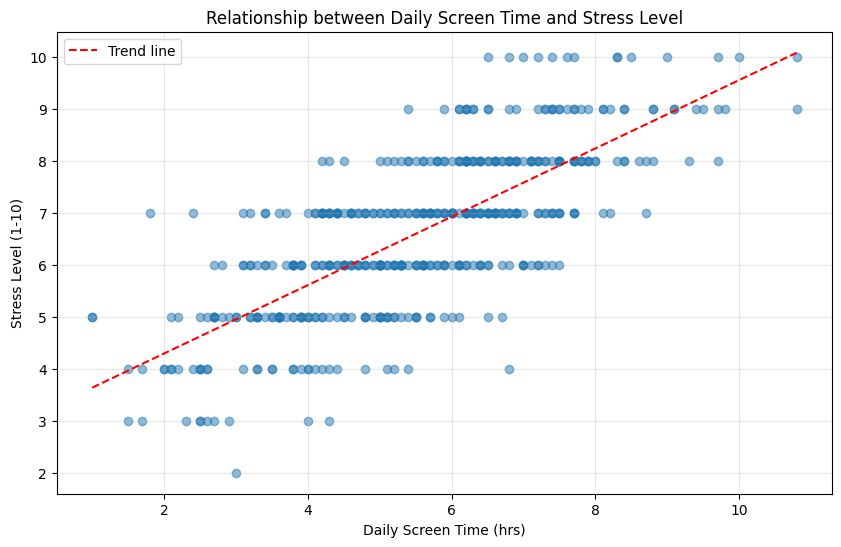

In [17]:
# Calculate correlation
correlation = df['Daily_Screen_Time(hrs)'].corr(df['Stress_Level(1-10)'])
print(f"Correlation coefficient: {correlation:.3f}")

# Summary statistics by screen time ranges
df['Screen_Time_Category'] = pd.cut(df['Daily_Screen_Time(hrs)'], 
                                     bins=[0, 4, 8, 12, 24],
                                     labels=['Light (0-4h)', 'Moderate (4-8h)', 'Heavy (8-12h)', 'Extreme (12-24h)'])

print("\nAverage Stress Level by Screen Time Category:")
print(df.groupby('Screen_Time_Category')['Stress_Level(1-10)'].agg(['mean', 'std', 'count']))

# Enhanced visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily_Screen_Time(hrs)'], df['Stress_Level(1-10)'], alpha=0.5)
z = np.polyfit(df['Daily_Screen_Time(hrs)'], df['Stress_Level(1-10)'], 1)
p = np.poly1d(z)
plt.plot(df['Daily_Screen_Time(hrs)'].sort_values(), p(df['Daily_Screen_Time(hrs)'].sort_values()), "r--", label='Trend line')
plt.xlabel('Daily Screen Time (hrs)')
plt.ylabel('Stress Level (1-10)')
plt.title('Relationship between Daily Screen Time and Stress Level')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

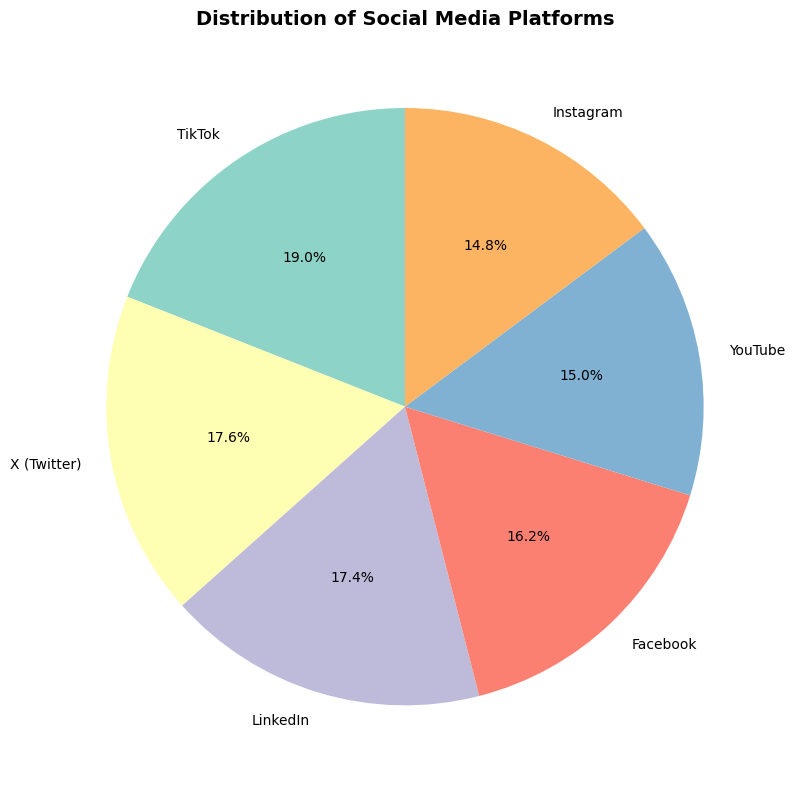

In [25]:
plt.figure(figsize=(10, 8))
plt.pie(df['Social_Media_Platform'].value_counts(), 
        labels=df['Social_Media_Platform'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3(range(len(df['Social_Media_Platform'].unique()))))
plt.title('Distribution of Social Media Platforms', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Sleep_Quality(1-10)'].value_counts().sort_index().index, 
        df['Sleep_Quality(1-10)'].value_counts().sort_index().values,
        color='steelblue')
plt.xlabel('Sleep Quality (1-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Stress Level', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

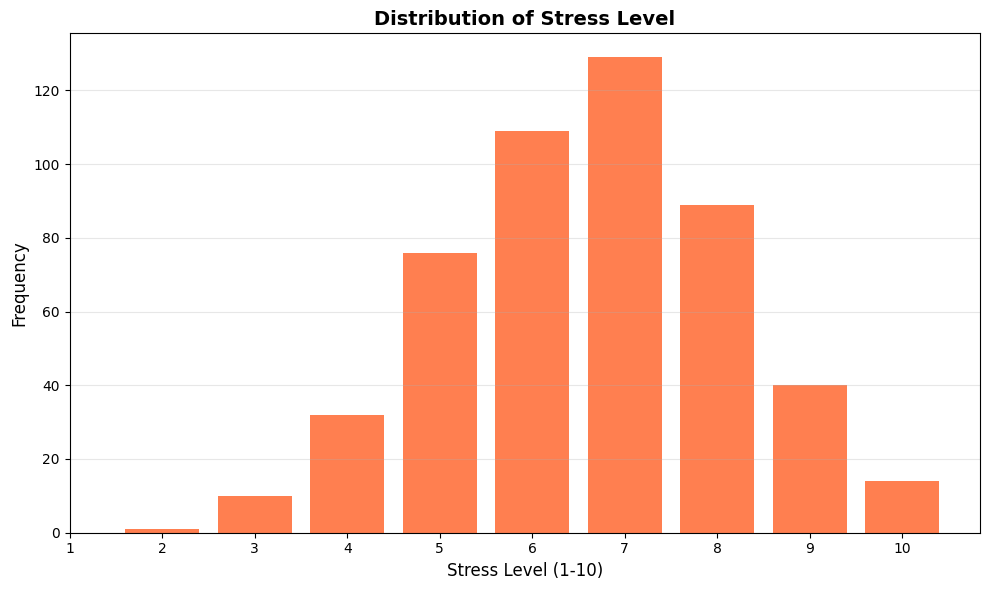

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(df['Stress_Level(1-10)'].value_counts().sort_index().index, 
        df['Stress_Level(1-10)'].value_counts().sort_index().values,
        color='coral')
plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Stress Level', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()